In [1]:
import os
import cv2
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create face_recognition model

current_id = 0
label_ids = {}
y_labels = []
x_train = []

image_dir = os.path.join(os.getcwd(), 'train_images')
face_cascade = cv2.CascadeClassifier(
    '../Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()

for image in os.listdir(image_dir):
    path = os.path.join(image_dir, image)
    label = os.path.basename(path).split(' ')[0]
    if not label in label_ids:
        label_ids[label] = current_id
        current_id += 1
    id_ = label_ids[label]
    
    pil_image = Image.open(path).convert('L')
    image_array = np.array(pil_image, 'uint8')
    faces = face_cascade.detectMultiScale(image_array, scaleFactor=1.2, minNeighbors=5)
    
    for x, y, w, h in faces:
        roi = image_array[y:y+h, x:x+w]
        x_train.append(roi)
        y_labels.append(id_)

with open('labels.pickle', 'wb') as f:
    pickle.dump(label_ids, f)

recognizer.train(x_train, np.array(y_labels))
recognizer.save('trainer.yml')

Recognized face: ari
Recognized face: fanni
Recognized face: jen
Recognized face: stephanie


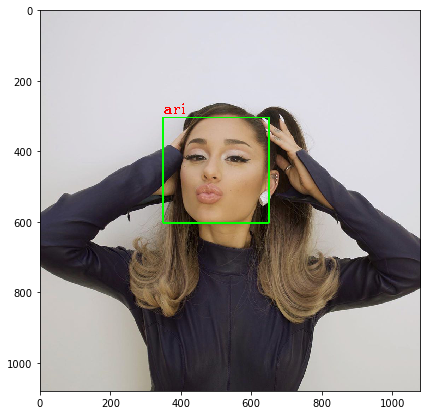

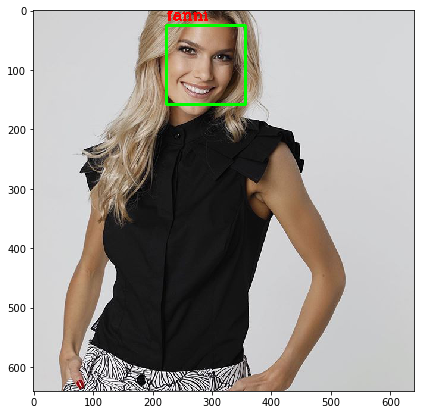

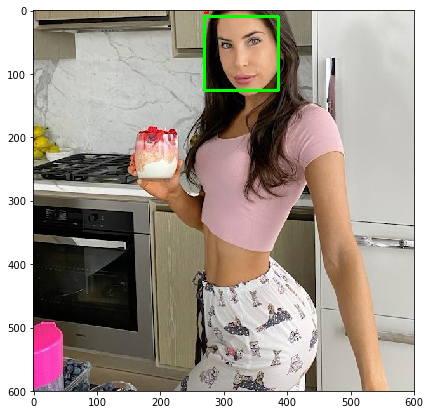

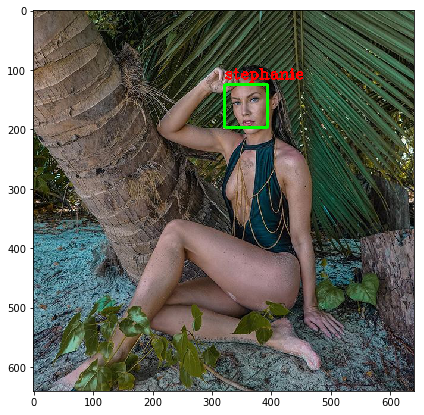

In [3]:
# Recognize faces on test images

labels = {}
with open('labels.pickle', 'rb') as f:
    labels = pickle.load(f)
    labels = {v:k for k,v in labels.items()}
test_images_dir = os.path.join(os.getcwd(), 'test_images')
for image in os.listdir(test_images_dir):
    
    test_image = cv2.imread('test_images/' + str(image))
    gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    for x, y, w, h in face:
            roi_gray = gray[y:y+h, x:x+w]
            id_, _ = recognizer.predict(roi_gray)
            font = cv2.FONT_HERSHEY_COMPLEX
            name = labels[id_]
            color = (0,0,255)
            cv2.putText(test_image,text=name,org=(x,y-10),fontFace=font,
                        fontScale=test_image.shape[1]/800, color=color,thickness=2)        
            cv2.rectangle(test_image, (x,y), (x+w,y+h), (0,255,0), 4)

    print('Recognized face:', name)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,7))
    plt.imshow(test_image)

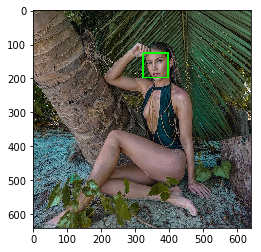

In [5]:
face_cascade = cv2.CascadeClassifier(
    '../Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')
ari = cv2.imread('test_images/stephanie.jpg')
ari = cv2.cvtColor(ari, cv2.COLOR_BGR2RGB)
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 4)
    return face_img
img = detect_face(ari)
plt.imshow(img)